# Contents
1. Imports
2. Checks
3. Overview
4. Distribution of Orders

# 1. Imports

In [2]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [4]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))

# 2. Checks

In [5]:
#Dimensions
df.shape

(32403719, 44)

In [6]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Overview

In [7]:
number_of_orders = df['order_id'].nunique()
print(number_of_orders)

3214684


## 3.1. Orders by Day of Week - Bar

In [8]:
# Count the number of orders per day
order_day_counts = df['order_day_of_week'].value_counts().sort_index()
order_day_counts

order_day_of_week
Monday       4213690
Tuesday      3840418
Wednesday    3783706
Thursday     4205651
Friday       4496316
Saturday     6203898
Sunday       5660040
Name: count, dtype: int64

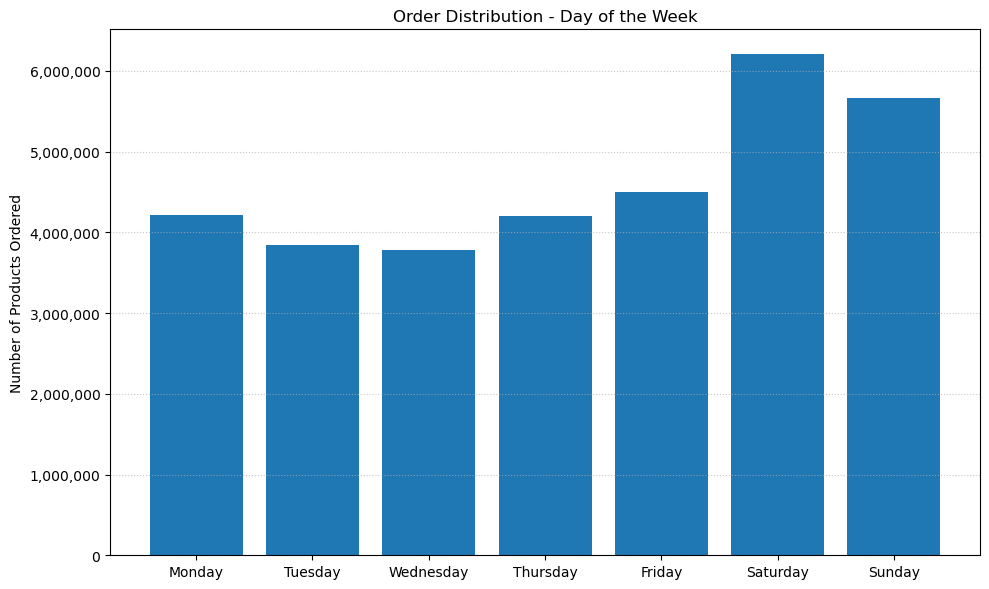

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/3.1_orders_dow.png


In [9]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_day_counts.index, order_day_counts.values)

# Set the title and labels
plt.title('Order Distribution - Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '3.1_orders_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Orders by Hour of Day - Bar

In [10]:
# Count the number of orders per day
order_hour_counts = df['order_hour_of_day'].value_counts().sort_index()
order_hour_counts

order_hour_of_day
0      218763
1      115698
2       69373
3       51281
4       53240
5       87957
6      290491
7      891026
8     1718082
9     2454127
10    2761660
11    2736010
12    2618430
13    2660846
14    2689036
15    2662044
16    2535106
17    2087564
18    1636436
19    1258275
20     976134
21     795619
22     634207
23     402314
Name: count, dtype: int64

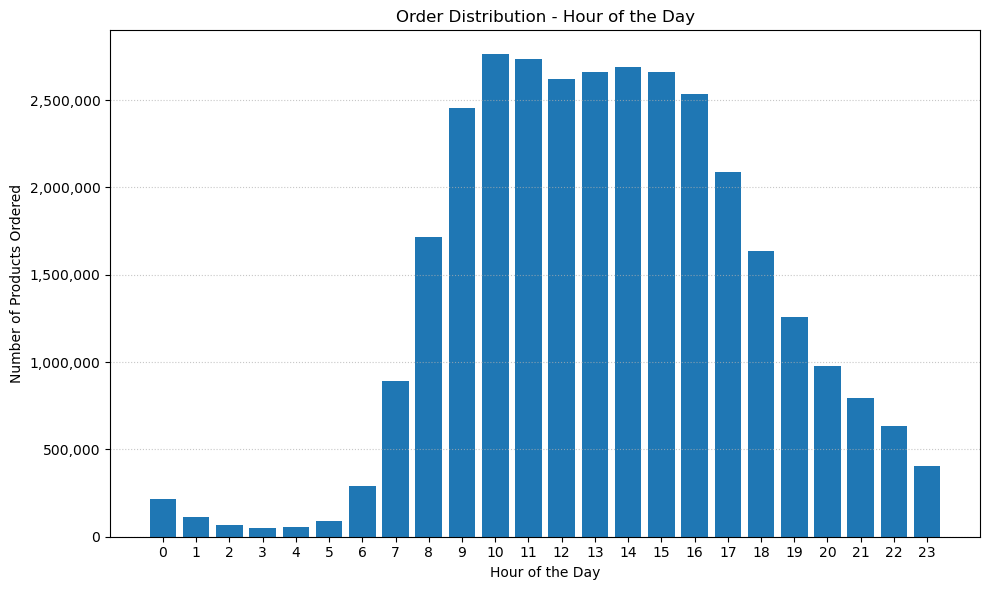

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/3.2_orders_hod.png


In [11]:
# Create a bar chart
plt.figure(figsize=(10, 6))

#plt.bar(order_hour_counts.index, order_hour_counts.values)
bars = plt.bar(order_hour_counts.index, order_hour_counts.values)

# Set the title and labels
plt.title('Order Distribution - Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

# Set x-axis ticks to show all hours
plt.xticks(ticks=order_hour_counts.index, labels=order_hour_counts.index)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '3.2_orders_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.3. Orders by Hour of Day of Week - Stacked Area

In [12]:
# Create a pivot table (cross-tabulation of orders by day and hour)
pitvot_days_hours = df.pivot_table(
    index='order_hour_of_day', 
    columns='order_day_of_week', 
    aggfunc='size', 
    fill_value=0,
    observed=False)

pitvot_days_hours

order_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
order_hour_of_day,,,,,,,
0,29892,27503,24701,29489,31255,38839,37084
1,14703,13553,13518,14954,18189,22499,18282
2,8335,8655,7972,9511,11379,12715,10806
3,7020,5768,6328,8318,7891,8846,7110
4,6797,6835,6914,8732,7928,8367,7667
5,12731,11728,11992,14720,10764,11617,14405
6,43761,40913,39794,46246,32101,34950,52726
7,122355,110599,113395,128739,117419,133244,165275
8,223787,198205,193955,223916,239119,306172,332928


<Figure size 1000x600 with 0 Axes>

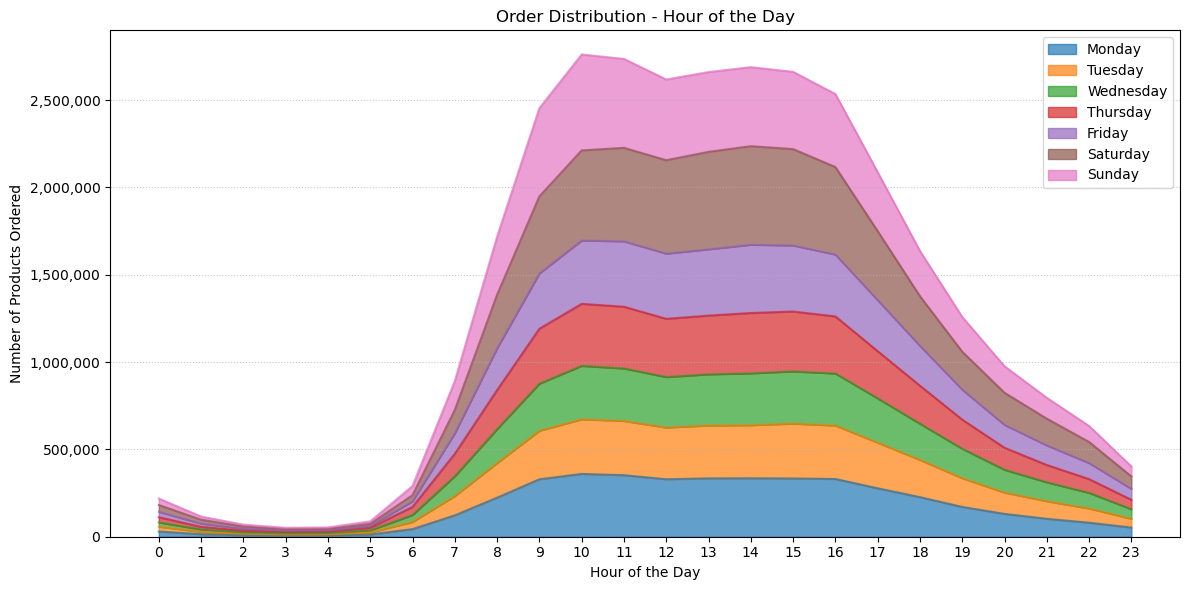

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/3.3_orders_hodow_area.png


In [13]:
# Plot stacked area chart
plt.figure(figsize=(10, 6))
ax = pitvot_days_hours.plot(kind='area', stacked=True, alpha=0.7, figsize=(12,6))

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.title('Order Distribution - Hour of the Day')
plt.legend(title='')

# Set x-axis ticks to show all hours
plt.xticks(ticks=order_hour_counts.index, labels=order_hour_counts.index)

# Format y-axis labels to remove scientific notation and use thousands separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Add gridlines to the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '3.3_orders_hodow_area.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.4. Orders by Hour of Day of Week - Heat Map

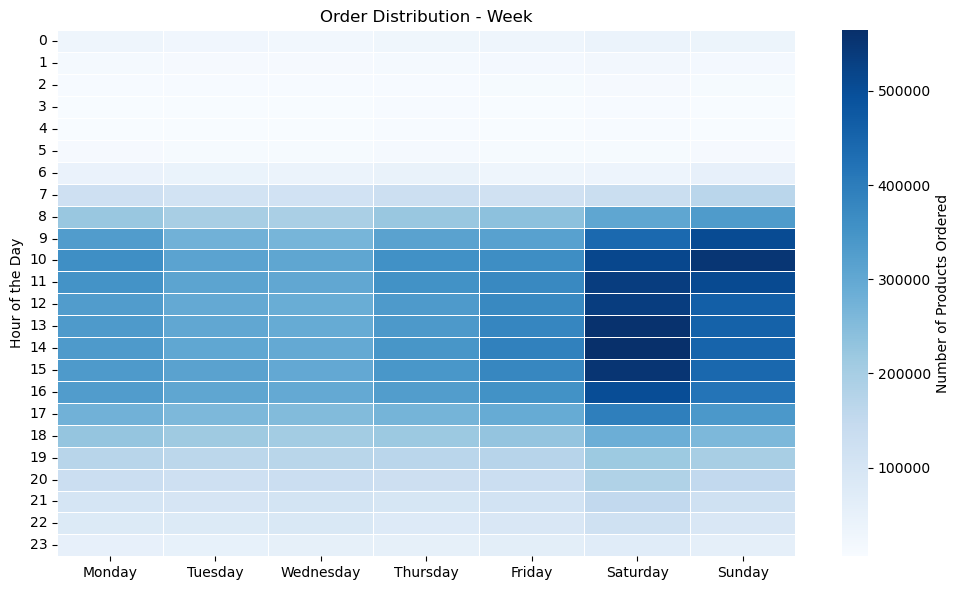

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/3.4_orders_hodow_heat.png


In [14]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pitvot_days_hours, cmap='Blues', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Number of Products Ordered'})

# Set labels and title
plt.xlabel('')
plt.ylabel('Hour of the Day')
plt.title('Order Distribution - Week')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '3.4_orders_hodow_heat.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.5. Orders by Hour of Day of Week - Bar

In [15]:
# Count the number of orders per hour of day of week
order_combined_counts = df['order_hour_of_day_week'].value_counts().sort_index()
order_combined_counts

order_hour_of_day_week
Monday - 0      29892
Monday - 1      14703
Monday - 2       8335
Monday - 3       7020
Monday - 4       6797
                ...  
Sunday - 19    198934
Sunday - 20    151995
Sunday - 21    119846
Sunday - 22     91761
Sunday - 23     57227
Name: count, Length: 168, dtype: int64

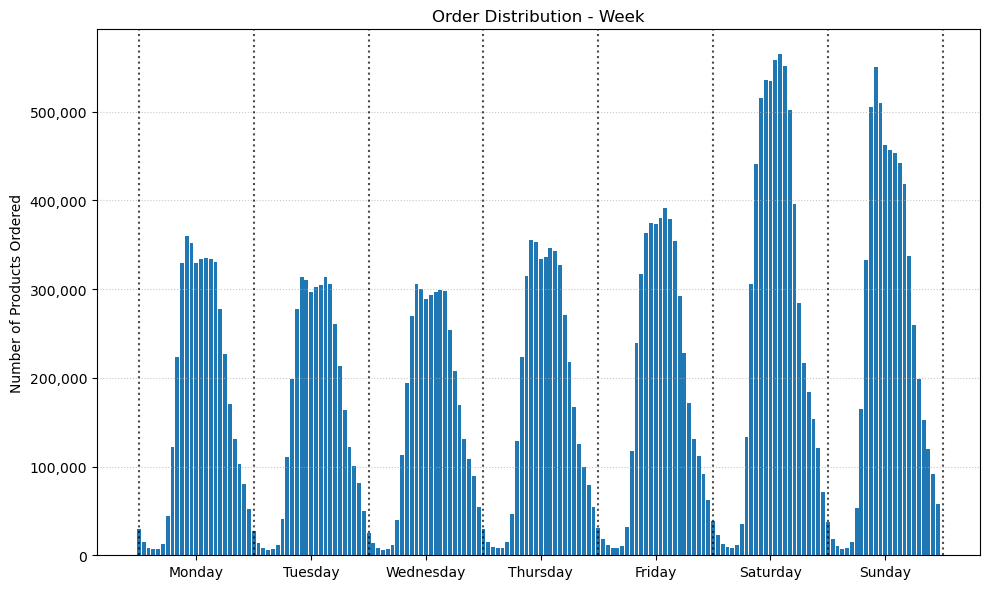

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/3.5_orders_hodow.png


In [16]:
# Create figure
plt.figure(figsize=(10, 6))
plt.bar(order_combined_counts.index, order_combined_counts.values)

# Set the title and labels
plt.title('Order Distribution - Week')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Comfirm categorical order 
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hour_order = list(range(24))  # Hours from 0 to 23

# Adjust x-axis labels to show only days, centered in the middle (hour 12)
day_labels = day_order  # ["Monday", "Tuesday", "Wednesday", ...]
day_positions = [(i * 24) + 12 for i in range(len(day_order))]  # Shift labels to the midpoint
plt.xticks(ticks=day_positions, labels=day_labels, rotation=0)  # Align labels to the middle of each day

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add vertical lines at the start of each day (hour 0, 24, 48, ...)
for i in range(len(day_order) + 1):  # +1 to include the last day separator
    plt.axvline(x=i * 24, color='black', linestyle='dotted', alpha=0.7)  # Dashed black lines

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '3.5_orders_hodow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

# 4. Distribution of Orders

## 4.1. Activity Flag

### 4.1.1. Day of the Week

In [17]:
# Create a cross-tabulation
order_activity_days = pd.crosstab(df['order_day_of_week'], df['activity_flag'])
order_activity_days

activity_flag,Low Activity,Moderate Activity,High Activity
order_day_of_week,,,
Monday,1103425,2049022,1061243
Tuesday,995634,1833723,1011061
Wednesday,947327,1811089,1025290
Thursday,1037633,2025410,1142608
Friday,1223475,2284686,988155
Saturday,1735271,3158340,1310287
Sunday,1451147,2778490,1430403


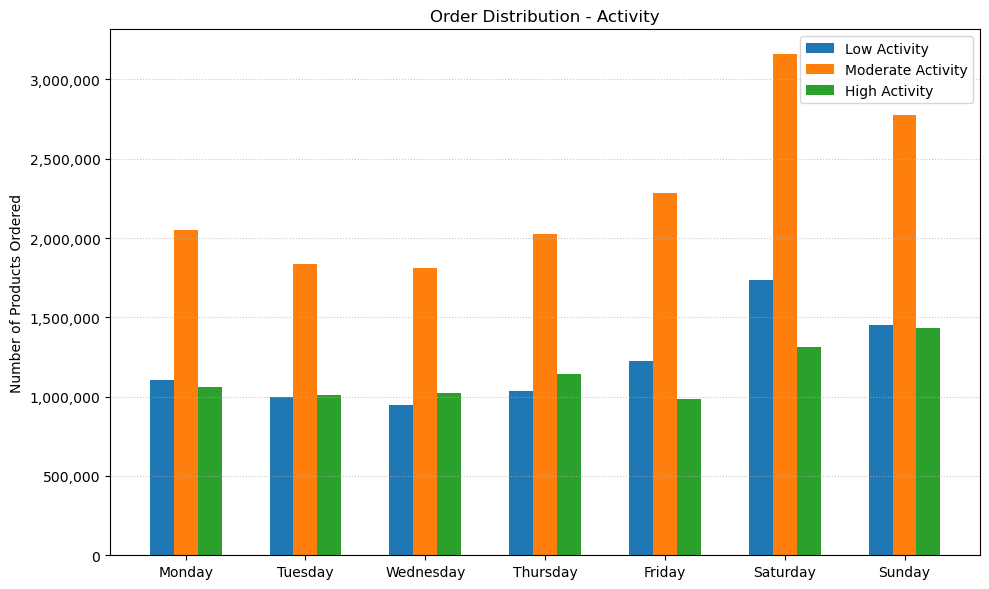

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.1.1_orders_activity_dow.png


In [18]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_activity_days.index))

# Plot each category as a separate bar (grouped format)
for i, activity_days in enumerate(order_activity_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_activity_days[activity_days], 
        width=bar_width, 
        label=activity_days
    )

# Formatting
plt.title('Order Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_activity_days.columns) - 1) / 2), order_activity_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.1.1_orders_activity_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.1.2. Hour of the Day

In [19]:
# Create a cross-tabulation
order_activity_hours = pd.crosstab(df['order_hour_of_day'], df['activity_flag'])
order_activity_hours

activity_flag,Low Activity,Moderate Activity,High Activity
order_hour_of_day,,,
0,62359,109530,46874
1,35467,56881,23350
2,21091,34338,13944
3,15638,25259,10384
4,15154,25053,13033
5,22035,43586,22336
6,60922,140671,88898
7,181192,435588,274246
8,369093,843004,505985


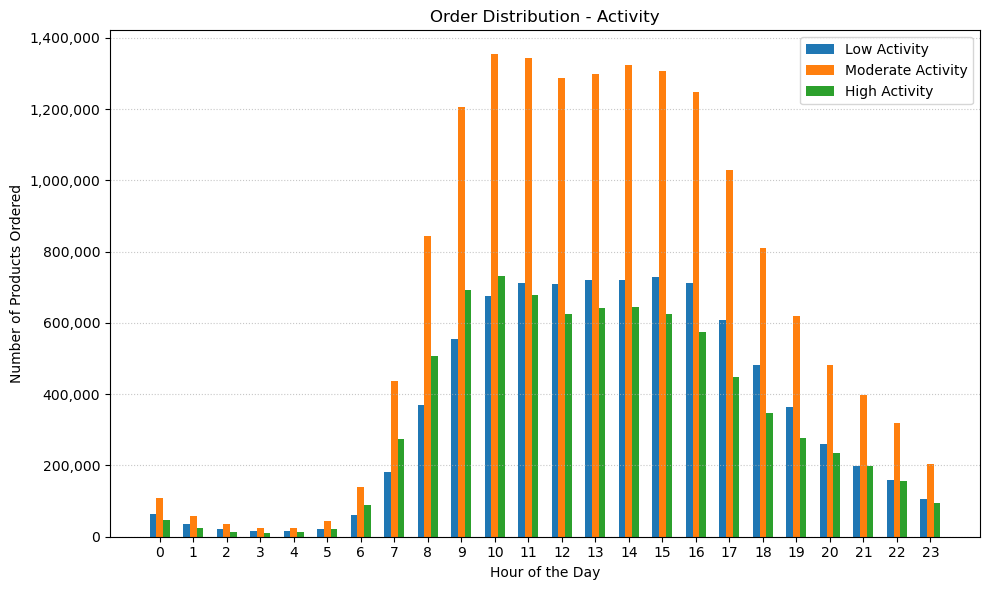

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.1.2_orders_activity_hod.png


In [20]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_activity_hours.index))

# Plot each category as a separate bar (grouped format)
for i, activity_hours in enumerate(order_activity_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_activity_hours[activity_hours], 
        width=bar_width, 
        label=activity_hours
    )

# Set the title and labels
plt.title('Order Distribution - Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_activity_hours.columns) - 1) / 2), order_activity_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.1.2_orders_activity_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.2. Spending Flag

### 4.2.1. Day of the Week

In [21]:
# Create a cross-tabulation
order_spending_days = pd.crosstab(df['order_day_of_week'], df['spending_flag'])
order_spending_days

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
order_day_of_week,,,,
Monday,1123355,2081870,960230,48235
Tuesday,1015425,1898874,881804,44315
Wednesday,989447,1871135,878926,44198
Thursday,1102596,2071107,983652,48296
Friday,994334,2290974,1152610,58398
Saturday,1355564,3193472,1578181,76681
Sunday,1524236,2782371,1288174,65259


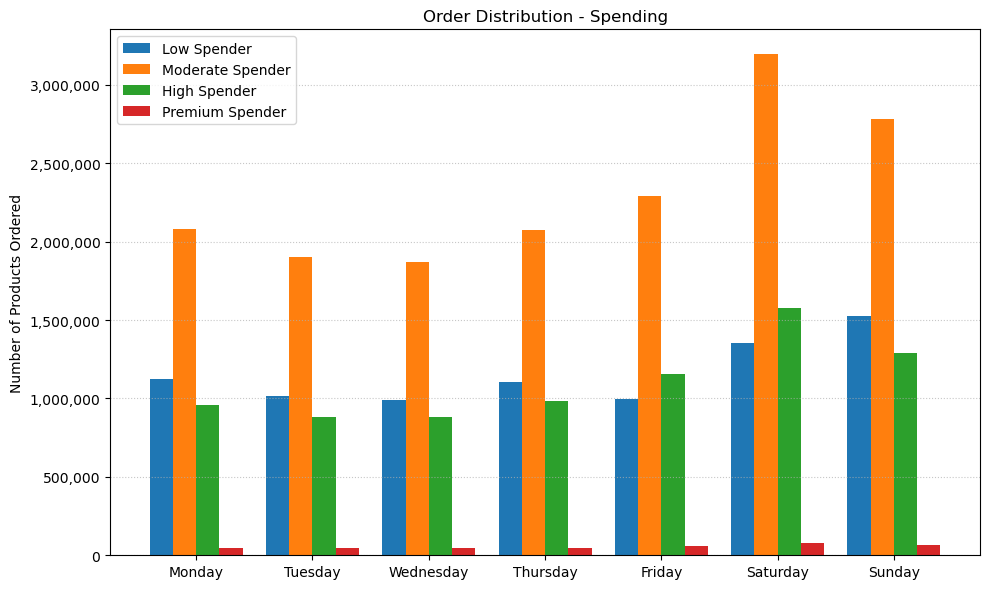

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.2.1_orders_spending_dow.png


In [22]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_spending_days.index))

# Plot each category as a separate bar (grouped format)
for i, spending_days in enumerate(order_spending_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_spending_days[spending_days], 
        width=bar_width, 
        label=spending_days
    )

# Formatting
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_spending_days.columns) - 1) / 2), order_spending_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.2.1_orders_spending_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.2.2. Hour of the Day

In [23]:
# Create a cross-tabulation
order_spending_hours = pd.crosstab(df['order_hour_of_day'], df['spending_flag'])
order_spending_hours

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
order_hour_of_day,,,,
0,53006,108376,54414,2967
1,28606,57513,27929,1650
2,17994,32653,17507,1219
3,12217,25151,13118,795
4,12849,26598,13027,766
5,20290,45338,21050,1279
6,66038,150506,70881,3066
7,209188,459956,212385,9497
8,430385,867164,402473,18060


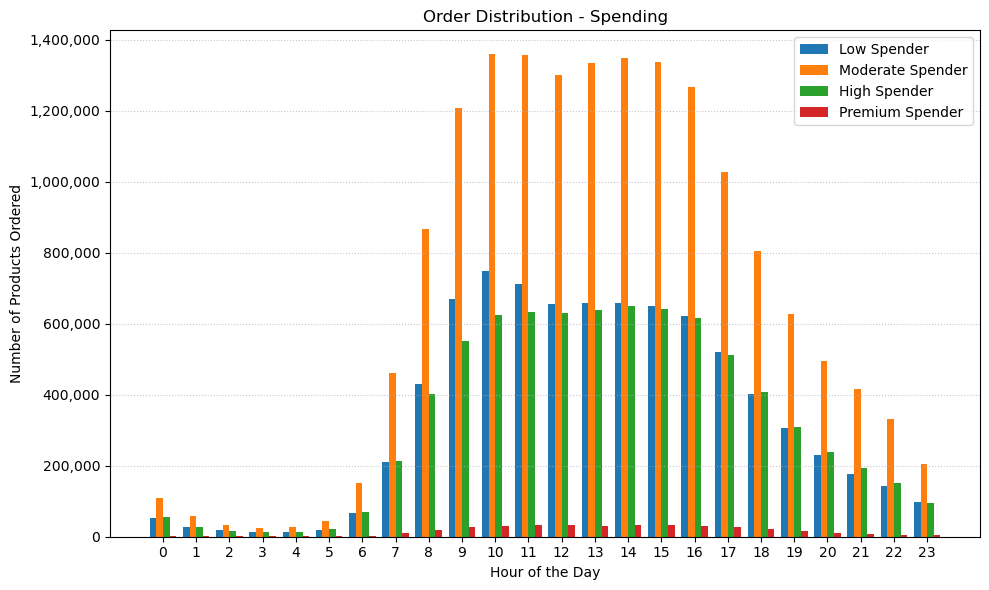

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.2.2_orders_spending_hod.png


In [24]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_spending_hours.index))

# Plot each category as a separate bar (grouped format)
for i, spending_hours in enumerate(order_spending_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_spending_hours[spending_hours], 
        width=bar_width, 
        label=spending_hours
    )

# Set the title and labels
plt.title('Order Distribution - Spending')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_spending_hours.columns) - 1) / 2), order_spending_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.2.2_orders_spending_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.3. Frequency Flag

### 4.3.1. Day of the Week

In [25]:
# Create a cross-tabulation
order_frequency_days = pd.crosstab(df['order_day_of_week'], df['frequency_flag'])
order_frequency_days

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
order_day_of_week,,,
Monday,1012287,1805132,1396271
Tuesday,901145,1584933,1354340
Wednesday,836211,1590175,1357320
Thursday,908980,1884616,1412055
Friday,1094519,2167760,1234037
Saturday,1611488,3002571,1589839
Sunday,1324896,2587805,1747339


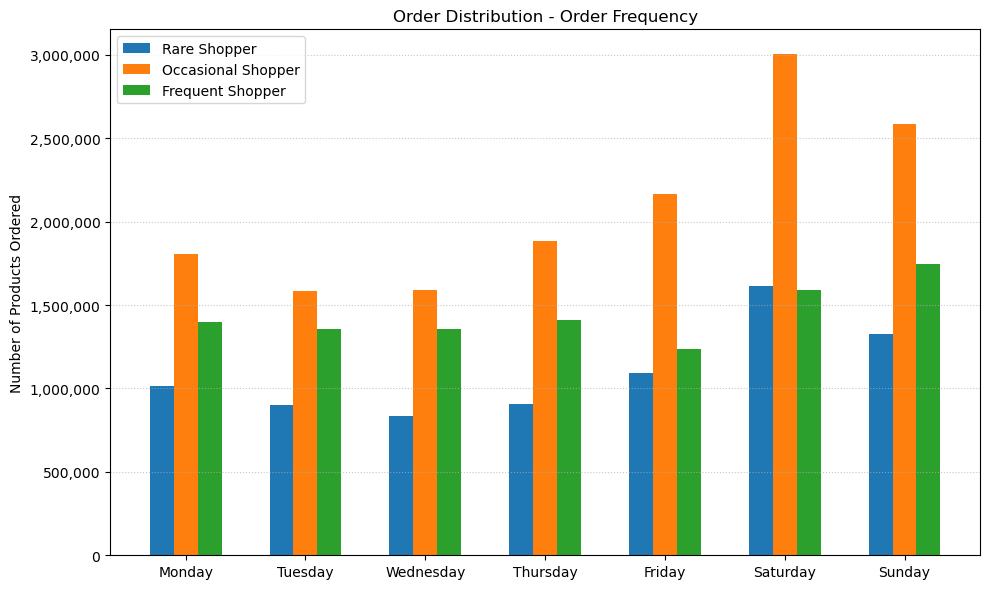

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.3.1_orders_frequency_dow.png


In [26]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_frequency_days.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_days in enumerate(order_frequency_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_frequency_days[frequency_days], 
        width=bar_width, 
        label=frequency_days
    )

# Formatting
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_frequency_days.columns) - 1) / 2), order_frequency_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.3.1_orders_frequency_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.3.2. Hour of the Day

In [27]:
# Create a cross-tabulation
order_frequency_hours = pd.crosstab(df['order_hour_of_day'], df['frequency_flag'])
order_frequency_hours

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
order_hour_of_day,,,
0,57267,97942,63554
1,31320,50502,33876
2,18468,28845,22060
3,13852,21741,15688
4,13421,22355,17464
5,19164,38296,30497
6,52913,127002,110576
7,162475,398165,330386
8,325436,788075,604571


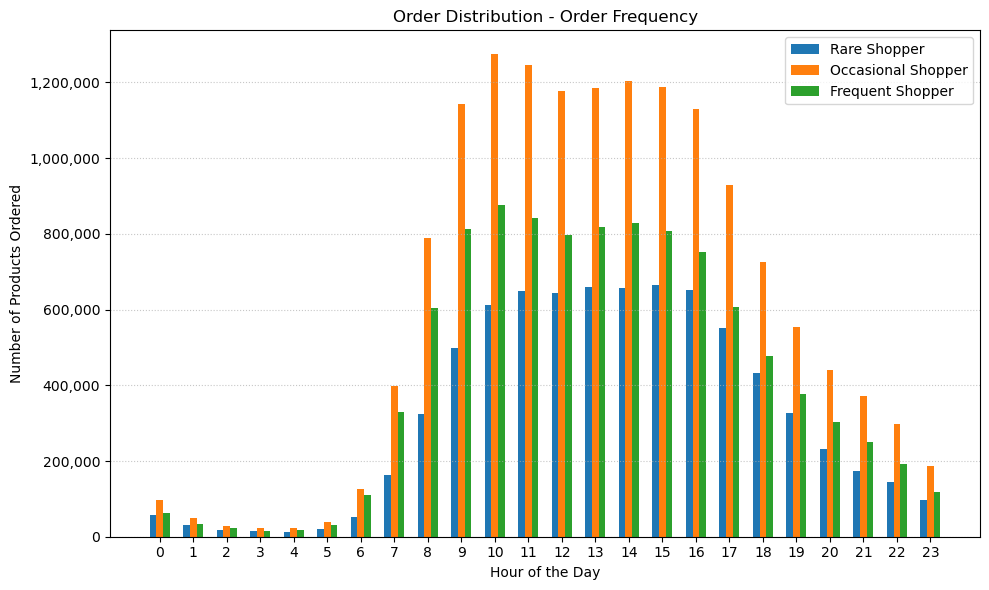

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.3.2_orders_frequency_hod.png


In [28]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_frequency_hours.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_hours in enumerate(order_frequency_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_frequency_hours[frequency_hours], 
        width=bar_width, 
        label=frequency_hours
    )

# Set the title and labels
plt.title('Order Distribution - Order Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_frequency_hours.columns) - 1) / 2), order_frequency_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.3.2_orders_frequency_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.4. Loyalty Flag

### 4.4.1. Day of the Week

In [29]:
# Create a cross-tabulation
order_loyalty_days = pd.crosstab(df['order_day_of_week'], df['loyalty_flag'])
order_loyalty_days

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
order_day_of_week,,,
Monday,1522992,1866020,824678
Tuesday,1352289,1688303,799826
Wednesday,1284273,1687750,811683
Thursday,1419126,1931066,855459
Friday,1608257,2088012,800047
Saturday,2287680,2880259,1035959
Sunday,2041358,2566515,1052167


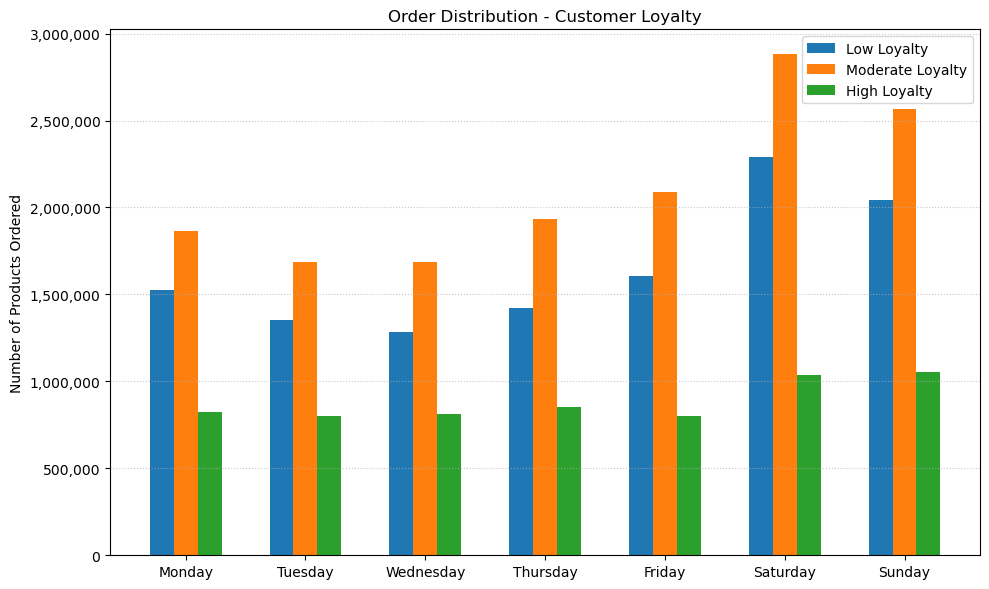

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.4.1_orders_loyalty_dow.png


In [30]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_loyalty_days.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_days in enumerate(order_loyalty_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_loyalty_days[loyalty_days], 
        width=bar_width, 
        label=loyalty_days
    )

# Formatting
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_loyalty_days.columns) - 1) / 2), order_loyalty_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.4.1_orders_loyalty_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.4.2. Hour of the Day

In [31]:
# Create a cross-tabulation
order_loyalty_hours = pd.crosstab(df['order_hour_of_day'], df['loyalty_flag'])
order_loyalty_hours

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
order_hour_of_day,,,
0,81909,98352,38502
1,45225,51282,19191
2,27431,29381,12561
3,19768,22355,9158
4,19632,23104,10504
5,28795,40652,18510
6,85282,132765,72444
7,262138,410538,218350
8,530424,802070,385588


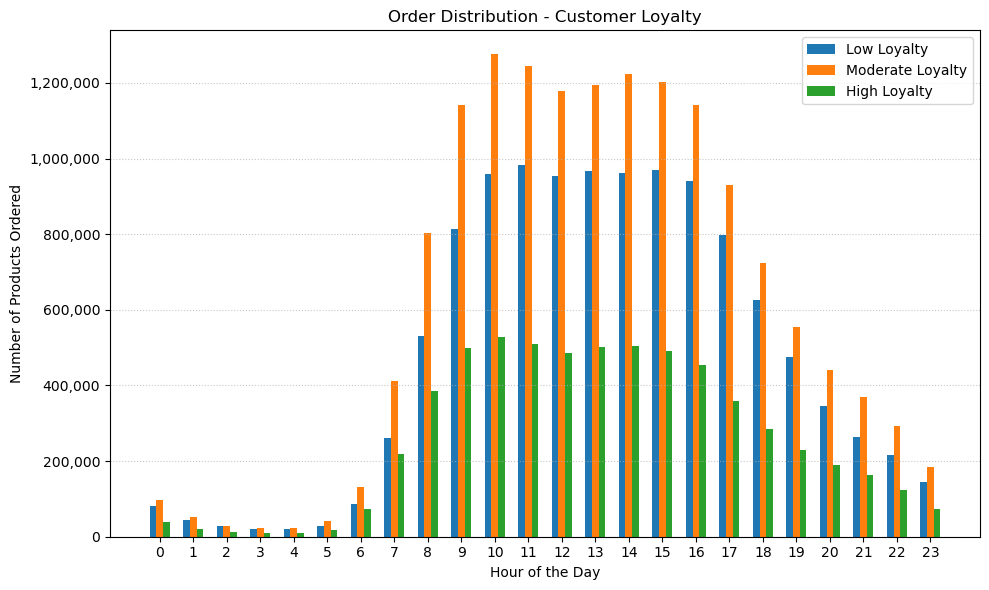

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.4.2_orders_loyalty_hod.png


In [32]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_loyalty_hours.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_hours in enumerate(order_loyalty_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_loyalty_hours[loyalty_hours], 
        width=bar_width, 
        label=loyalty_hours
    )

# Set the title and labels
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_loyalty_hours.columns) - 1) / 2), order_loyalty_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.4.2_orders_loyalty_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.5. Region

### 4.5.1. Day of the Week

In [33]:
# Create a cross-tabulation
order_region_days = pd.crosstab(df['order_day_of_week'], df['region'])
order_region_days

region,West,Midwest,South,Northeast
order_day_of_week,,,,
Monday,1071225,991732,1404620,746113
Tuesday,978766,895065,1287301,679286
Wednesday,970780,888107,1258501,666318
Thursday,1076293,983238,1399689,746431
Friday,1154268,1058068,1496717,787263
Saturday,1593884,1460090,2052696,1097228
Sunday,1447425,1320715,1891989,999911


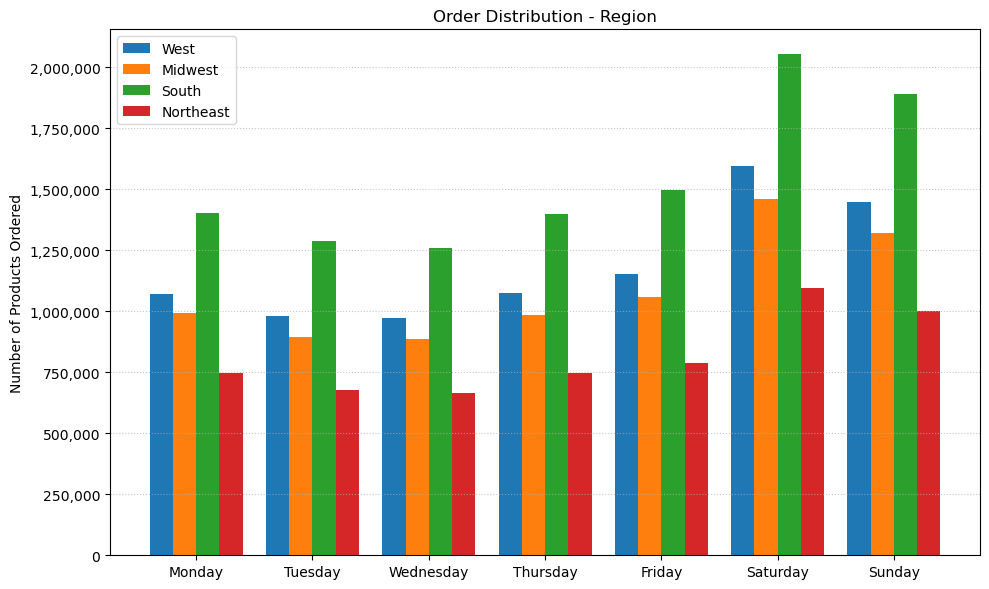

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.5.1_orders_region_dow.png


In [34]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_activity_days.index))

# Plot each category as a separate bar (grouped format)
for i, region_days in enumerate(order_region_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_region_days[region_days], 
        width=bar_width, 
        label=region_days
    )

# Formatting
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_region_days.columns) - 1) / 2), order_region_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.5.1_orders_region_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.5.2. Hour of the Day

In [35]:
# Create a cross-tabulation
order_region_hours = pd.crosstab(df['order_hour_of_day'], df['region'])
order_region_hours

region,West,Midwest,South,Northeast
order_hour_of_day,,,,
0,56163,50748,73297,38555
1,28889,27360,37906,21543
2,17972,16987,21978,12436
3,12717,11909,17437,9218
4,13077,12690,17966,9507
5,21868,19856,30838,15395
6,73956,67296,98694,50545
7,226080,208262,297736,158948
8,435575,398132,579041,305334


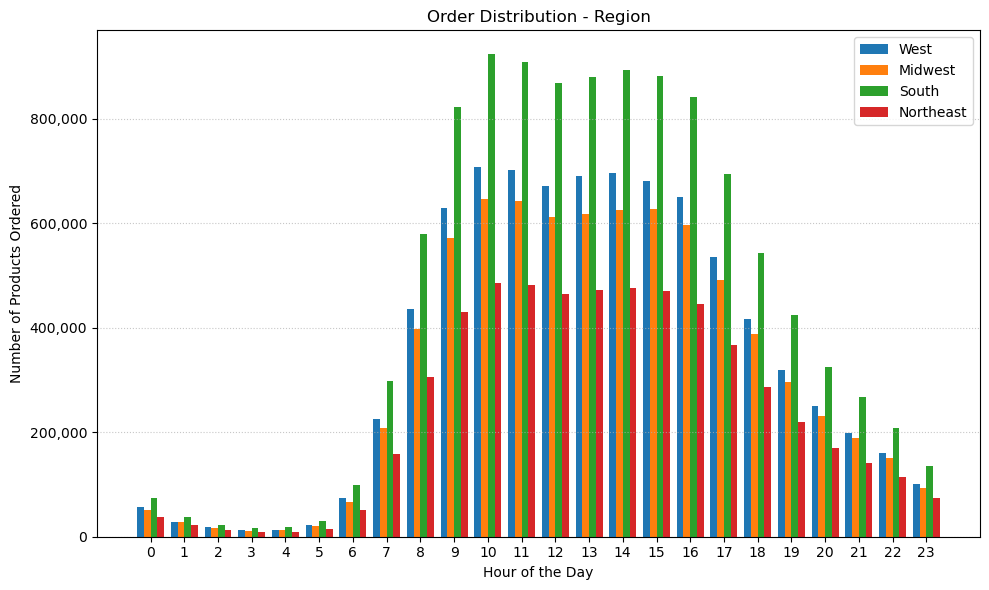

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.5.2_orders_region_hod.png


In [36]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_region_hours.index))

# Plot each category as a separate bar (grouped format)
for i, region_hours in enumerate(order_region_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_region_hours[region_hours], 
        width=bar_width, 
        label=region_hours
    )

# Set the title and labels
plt.title('Order Distribution - Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_region_hours.columns) - 1) / 2), order_region_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.5.2_orders_region_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.6. Age Profile

### 4.6.1. Day of the Week

In [37]:
# Create a cross-tabulation
order_age_days = pd.crosstab(df['order_day_of_week'], df['age_profile'])
order_age_days

age_profile,Young Adult,Adult,Middle Aged,Senior
order_day_of_week,,,,
Monday,523036,1315094,1324750,1050810
Tuesday,476189,1201744,1199391,963094
Wednesday,472188,1188461,1183816,939241
Thursday,527601,1313088,1311907,1053055
Friday,563670,1394915,1403721,1134010
Saturday,772687,1957027,1925066,1549118
Sunday,709660,1785461,1766456,1398463


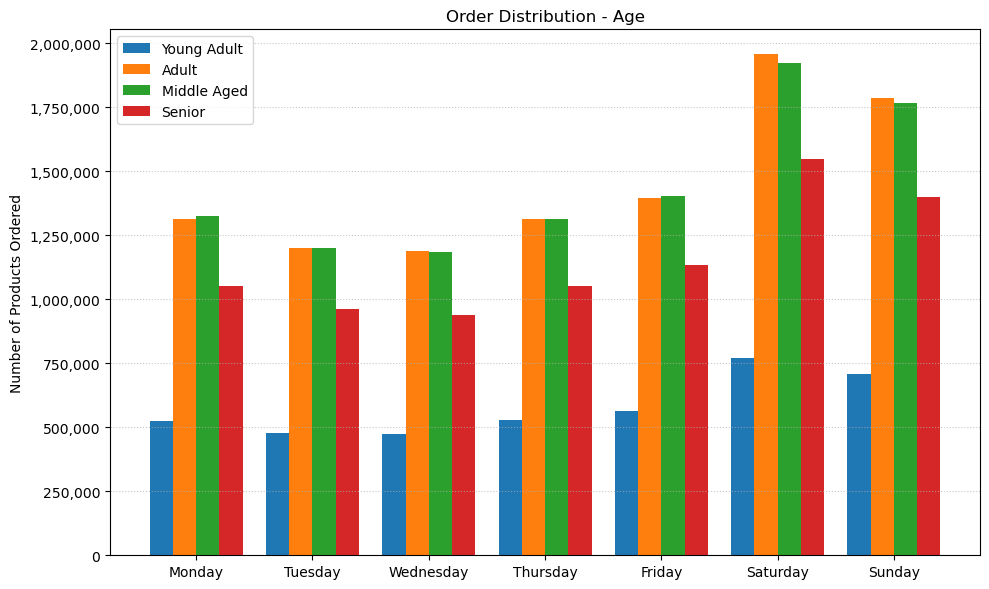

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.6.1_orders_age_dow.png


In [38]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_age_days.index))

# Plot each category as a separate bar (grouped format)
for i, age_days in enumerate(order_age_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_age_days[age_days], 
        width=bar_width, 
        label=age_days
    )

# Formatting
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_age_days.columns) - 1) / 2), order_age_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.6.1_orders_age_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.6.2. Hour of the Day

In [39]:
# Create a cross-tabulation
order_age_hours = pd.crosstab(df['order_hour_of_day'], df['age_profile'])
order_age_hours

age_profile,Young Adult,Adult,Middle Aged,Senior
order_hour_of_day,,,,
0,27889,70850,66886,53138
1,15216,37336,34905,28241
2,9510,22155,20338,17370
3,6449,16605,15099,13128
4,7228,15711,16802,13499
5,11573,26634,27209,22541
6,39540,89770,88662,72519
7,111938,274592,277631,226865
8,210786,538210,538172,430914


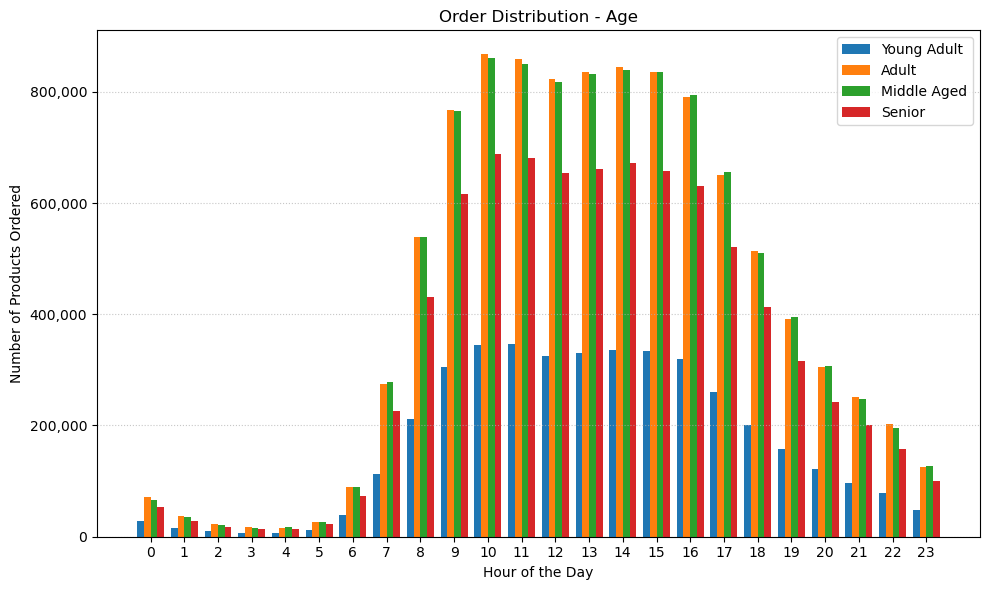

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.6.2_orders_age_hod.png


In [40]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_age_hours.index))

# Plot each category as a separate bar (grouped format)
for i, age_hours in enumerate(order_age_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_age_hours[age_hours], 
        width=bar_width, 
        label=age_hours
    )

# Set the title and labels
plt.title('Order Distribution - Age')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_age_hours.columns) - 1) / 2), order_age_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.6.2_orders_age_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.7. Income Profile

### 4.7.1. Day of the Week

In [41]:
# Create a cross-tabulation
order_income_days = pd.crosstab(df['order_day_of_week'], df['income_profile'])
order_income_days

income_profile,Low Income,Middle Income,High Income
order_day_of_week,,,
Monday,1023219,2083789,1106682
Tuesday,922572,1899814,1018032
Wednesday,908622,1872488,1002596
Thursday,1011213,2088406,1106032
Friday,951373,2315952,1228991
Saturday,1305257,3207479,1691162
Sunday,1398677,2784217,1477146


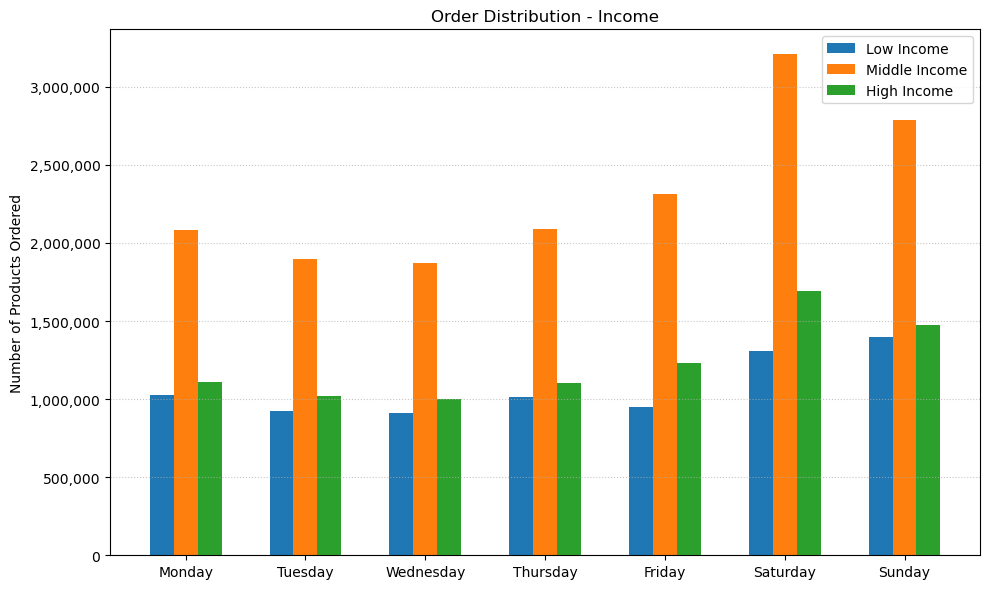

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.7.1_orders_income_dow.png


In [42]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_income_days.index))

# Plot each category as a separate bar (grouped format)
for i, income_days in enumerate(order_income_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_income_days[income_days], 
        width=bar_width, 
        label=income_days
    )

# Formatting
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_income_days.columns) - 1) / 2), order_income_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.7.1_orders_income_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.7.2. Hour of the Day

In [43]:
# Create a cross-tabulation
order_income_hours = pd.crosstab(df['order_hour_of_day'], df['income_profile'])
order_income_hours

income_profile,Low Income,Middle Income,High Income
order_hour_of_day,,,
0,49258,111949,57556
1,27053,59125,29520
2,17442,33275,18656
3,11838,25802,13641
4,12571,26037,14632
5,20510,44117,23330
6,66087,146818,77586
7,197608,455136,238282
8,396700,865394,455988


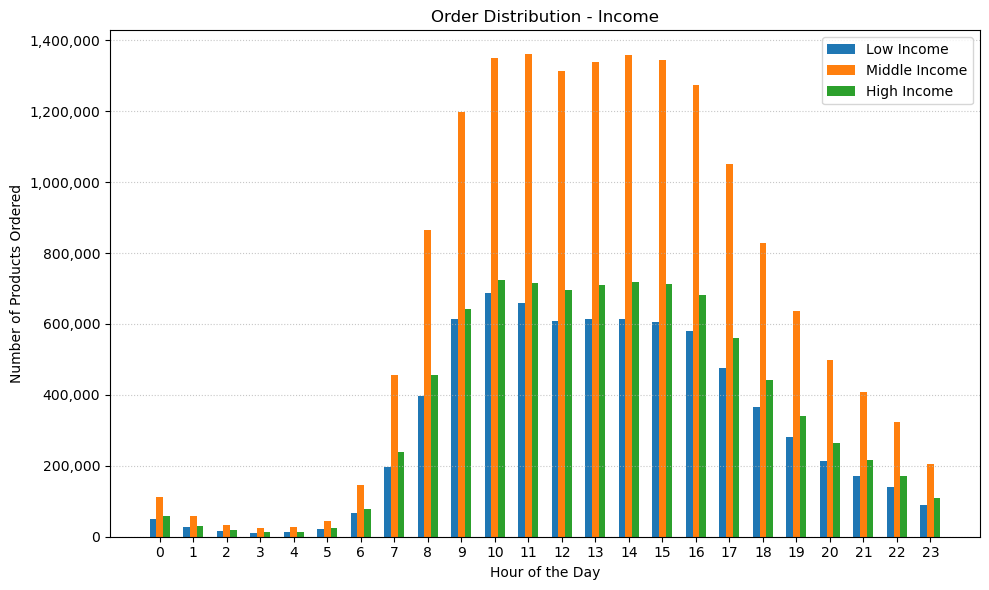

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.7.2_orders_income_hod.png


In [44]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_income_hours.index))

# Plot each category as a separate bar (grouped format)
for i, income_hours in enumerate(order_income_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_income_hours[income_hours], 
        width=bar_width, 
        label=income_hours
    )

# Set the title and labels
plt.title('Order Distribution - Income')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_income_hours.columns) - 1) / 2), order_income_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.7.2_orders_income_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.8. Family Status

### 4.8.1. Day of the Week

In [45]:
# Create a cross-tabulation
order_family_days = pd.crosstab(df['order_day_of_week'], df['family_status'])
order_family_days

family_status,Single Adult,Young Parent,Family
order_day_of_week,,,
Monday,1049111,201505,2963074
Tuesday,959323,182309,2698786
Wednesday,945189,180786,2657731
Thursday,1057107,203193,2945351
Friday,1111559,216157,3168600
Saturday,1550253,295210,4358435
Sunday,1424755,271385,3963900


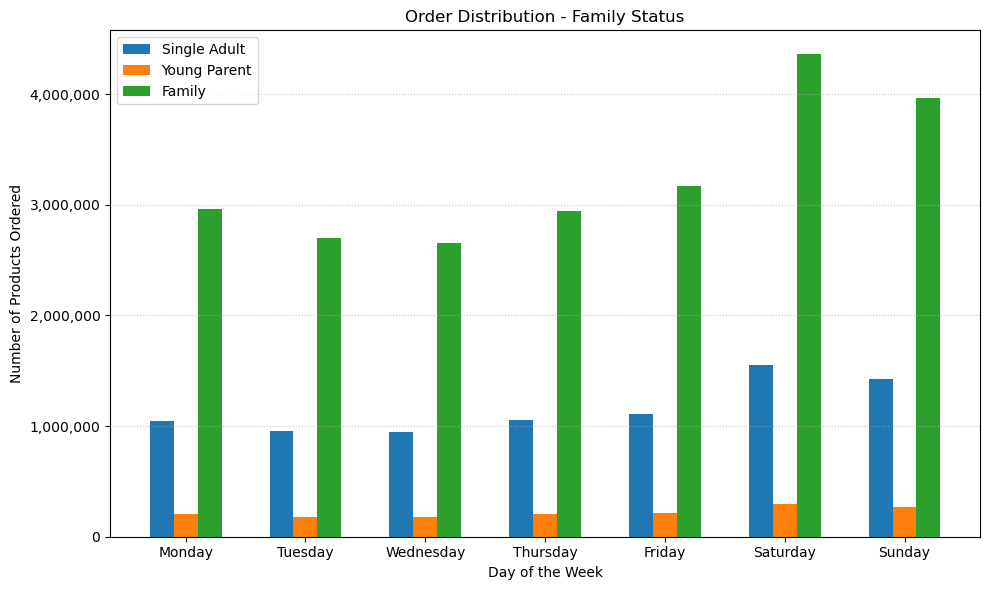

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.8.1_orders_family_dow.png


In [46]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_family_days.index))

# Plot each category as a separate bar (grouped format)
for i, family_days in enumerate(order_family_days.columns):
    plt.bar(
        x + i * bar_width, 
        order_family_days[family_days], 
        width=bar_width, 
        label=family_days
    )

# Formatting
plt.title('Order Distribution - Family Status')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_family_days.columns) - 1) / 2), order_family_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.8.1_orders_family_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.8.2. Hour of the Day

In [47]:
# Create a cross-tabulation
order_family_hours = pd.crosstab(df['order_hour_of_day'], df['family_status'])
order_family_hours

family_status,Single Adult,Young Parent,Family
order_hour_of_day,,,
0,54172,11043,153548
1,28342,5946,81410
2,17569,3754,48050
3,13015,2602,35664
4,12739,2990,37511
5,22052,4554,61351
6,73489,15493,201509
7,226969,43855,620202
8,431495,78917,1207670


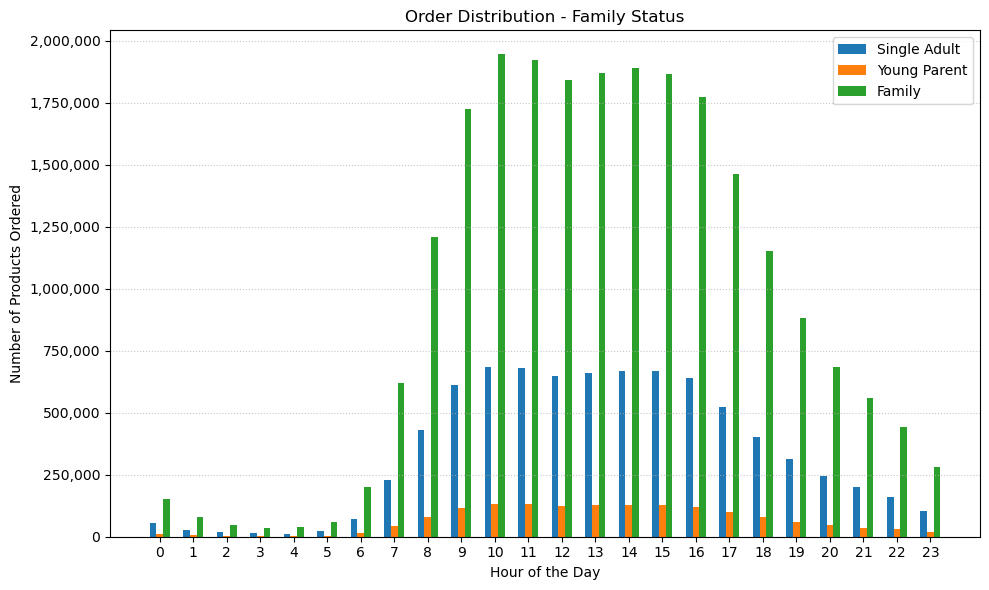

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Orders/4.8.2_orders_family_hod.png


In [48]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_activity_hours.index))

# Plot each category as a separate bar (grouped format)
for i, family_hours in enumerate(order_family_hours.columns):
    plt.bar(
        x + i * bar_width, 
        order_family_hours[family_hours], 
        width=bar_width, 
        label=family_hours
    )

# Set the title and labels
plt.title('Order Distribution - Family Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_family_hours.columns) - 1) / 2), order_family_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Orders', '4.8.2_orders_family_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")